## Naive_Bayes -MNIST_Handwritten
#### Evaluating Classifier
#### Regression & Ablation (Feature Extraction)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import itertools

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from collections import Counter 

import matplotlib as mpl
%matplotlib inline

### Data Load
Downloaded the MNIST (train and test) data from the github. 

In [3]:
with open \
  ('mnist_train_data.csv', 'r') as f:
        X_train = pd.read_csv(f, header=None)
with open \
  ('mnist_train_labels.csv', 'r') as f:
        y_train = pd.read_csv(f, header=None, names = ['labels'])
with open \
  ('mnist_test_data.csv', 'r') as f:
        X_test = pd.read_csv(f, header=None)

with open \
  ('mnist_test_labels.csv', 'r') as f:
        y_test = pd.read_csv(f, header=None)

In [4]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
lbls = y_train['labels'].unique()

In [6]:
lbls.sort()
print (lbls)

[0 1 2 3 4 5 6 7 8 9]


### Generative Learning - Computing prior probalities

In [7]:
lbl_cnt_lst = []
priors = []
priors_dict = {}

for l in lbls: 
    cnt = y_train[y_train['labels'] == l].count()[0] 
    lbl_cnt_lst.append(cnt)  
    tmp_prior = cnt / len (y_train)
    priors.append(tmp_prior)
    
    priors_dict[l] = tmp_prior
    print ("Count for label", l ," = " , cnt, " and Prior probabilty ", " = ", tmp_prior)

print ("\nChecking Sum of all priors = ", sum(priors))

Count for label 0  =  592  and Prior probabilty   =  0.0986666666667
Count for label 1  =  671  and Prior probabilty   =  0.111833333333
Count for label 2  =  581  and Prior probabilty   =  0.0968333333333
Count for label 3  =  608  and Prior probabilty   =  0.101333333333
Count for label 4  =  623  and Prior probabilty   =  0.103833333333
Count for label 5  =  514  and Prior probabilty   =  0.0856666666667
Count for label 6  =  608  and Prior probabilty   =  0.101333333333
Count for label 7  =  651  and Prior probabilty   =  0.1085
Count for label 8  =  551  and Prior probabilty   =  0.0918333333333
Count for label 9  =  601  and Prior probabilty   =  0.100166666667

Checking Sum of all priors =  1.0


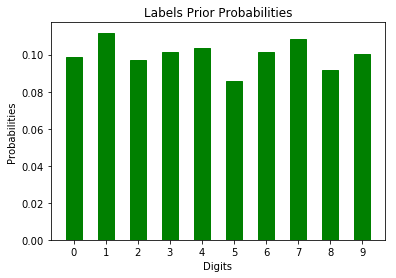

In [37]:
plt.bar(lbls,priors_dict.values(),width=.5, \
        color='green',edgecolor='green')
plt.ylabel('Probabilities')
plt.xlabel('Digits')
plt.title('Labels Prior Probabilities')
plt.xticks(lbls, ('0', '1', '2', '3', '4','5','6','7','8','9'))
plt.show()

In [8]:
#rett = y_train[0].value_counts()
log_priors= np.log(priors)
print ("\n Log of priors list = \n", log_priors)


 Log of priors list = 
 [-2.31600811 -2.19074561 -2.33476399 -2.28933987 -2.26496823 -2.45729148
 -2.28933987 -2.22100511 -2.38777994 -2.30091981]





### Computing maximum likelihood of each class using Laplacian Smoothing

In [9]:
merged_df = pd.concat([X_train, y_train ], axis = 1)
pji = np.zeros(shape=[10, 784])

for l in lbls: 
    temp_df = merged_df.loc[merged_df['labels'] == l]
    temp_df = temp_df.drop('labels', 1)
    np_sum = (temp_df.values).sum(axis = 0)
    
    np_pr = (np_sum +1 ) / (temp_df.shape[0] + 2)
    pji[l, :] = np_pr
    print ("Highest Probability(Pji) for label", l,   " = ",np_pr.max())

log_pji = np.log(pji.T)

Highest Probability(Pji) for label 0  =  0.851851851852
Highest Probability(Pji) for label 1  =  0.98514115899
Highest Probability(Pji) for label 2  =  0.728987993139
Highest Probability(Pji) for label 3  =  0.808196721311
Highest Probability(Pji) for label 4  =  0.8496
Highest Probability(Pji) for label 5  =  0.711240310078
Highest Probability(Pji) for label 6  =  0.849180327869
Highest Probability(Pji) for label 7  =  0.794793261868
Highest Probability(Pji) for label 8  =  0.875226039783
Highest Probability(Pji) for label 9  =  0.867330016584


### Use naive bayes formula to to classify test data 

In [10]:
left_term = np.matmul(X_test, log_pji)

In [11]:
right_term = np.matmul((1 - X_test), np.log(1 - pji).T )

In [12]:
final = np.add(( left_term + right_term), log_priors)

In [13]:
y_predicted = np.argmax(final, axis = 1)


In [14]:
print ('Using Naive Bayes - Test accuracy is {}% '.format(accuracy_score(y_test, y_predicted) * 100))

Using Naive Bayes - Test accuracy is 80.9% 


### Computing the confusion matrix  

In [15]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.OrRd):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

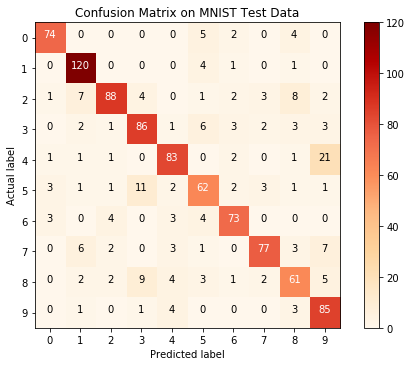

In [16]:
cnf_matrix = confusion_matrix(y_test, y_predicted)  # Creating confusion matrix
plt.figure(figsize = (7,5))
plot_confusion_matrix(cnf_matrix, classes=lbls, title='Confusion Matrix on MNIST Test Data')

plt.show()

In [17]:
incorr_dict  = dict()

for row in range(len(cnf_matrix)):
    for col in range(len(cnf_matrix)):
        if row != col:
            key = 'True label '+ str(row) + ' predicted as ' + str(col) + ' incorrect count ='
            incorr_dict[key] = cnf_matrix[row, col]
            
            
print ('Top 3 pairs with most (absolute number) incorrect classifications are')
Counter(incorr_dict).most_common(3)

Top 3 pairs with most (absolute number) incorrect classifications are


[('True label 4 predicted as 9 incorrect count =', 21),
 ('True label 5 predicted as 3 incorrect count =', 11),
 ('True label 8 predicted as 3 incorrect count =', 9)]

### Top 3 pairs with most (absolute number) incorrect classifications are
####  [('True label 4 predicted as 9 incorrect count =', 21),
####   ('True label 5 predicted as 3 incorrect count =', 11),
####   ('True label 8 predicted as 3 incorrect count =', 9)]

### Visualizing two missclassfied on test data

In [19]:
def displaychar(image):
    plt.imshow(np.reshape(image.values, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [20]:
mistake_indx = y_test.loc[ (y_test[0] !=  pd.DataFrame(y_predicted)[0] ) ].index

In [21]:
print ("Total misclassified labels out of test data= ", len(mistake_indx) )
print ("Index of misclassified labels ", mistake_indx );

Total misclassified labels out of test data=  191
Index of misclassified labels  Int64Index([  8,  15,  22,  33,  38,  46,  54,  55,  63,  65,
            ...
            952, 956, 959, 960, 965, 975, 982, 985, 994, 998],
           dtype='int64', length=191)


First, True label


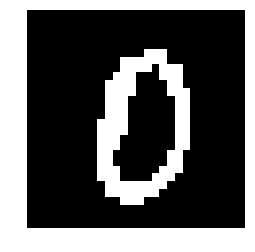

Misclassified as  label 8


In [22]:
print ("First, True label");
displaychar(X_test.loc[55, :])
print ("Misclassified as  label", y_predicted[55] );

Second, True label


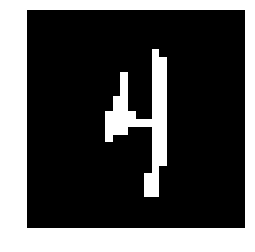

Misclassified as  label 9


In [23]:
print ("Second, True label");
displaychar(X_test.loc[65, :])
print ("Misclassified as  label", y_predicted[65] );

### Evaluating Classifier Metrics 

In [39]:
digits_data = datasets.load_digits()
X = digits_data.data
y = digits_data.target
# print ("Shape of X = ", X.shape)
# print ("Shape of y = ", y.shape)

In [40]:
X_test = X[-1300:]
X_train = X[:-1300]
y_test = y[-1300:]
y_train = y[:-1300]
print ("Shape of X_train, X_test : ", X_train.shape, X_test.shape)
print ("Shape of y_train, y_test : ", y_train.shape, y_test.shape)

Shape of X_train, X_test :  (497, 64) (1300, 64)
Shape of y_train, y_test :  (497,) (1300,)


In [41]:
clf = KNeighborsClassifier(n_neighbors= 5, metric = 'chebyshev')
clf.fit(X_train, y_train )
y_pred = clf.predict(X_test)
print ('K-Nearest Classifier, evaluating accuracy {}% '.format(accuracy_score(y_test, y_pred) * 100))

K-Nearest Classifier, evaluating accuracy 89.38461538461539% 


In [42]:
TP = sum(y_pred[y_test == 3] == 3)
FP = sum(y_pred[y_test != 3] == 3)
TN = sum(y_pred[y_test != 3] != 3)
FN = sum(y_pred[y_test == 3] != 3)

In [43]:
print ('Values of TP, TN, FP, FN = ', TP, TN, FP, FN)


Values of TP, TN, FP, FN =  113 1157 13 17


In [44]:
eval_dict = {}
Sensitivity = TP/(TP+FN)
TPR = Recall = Sensitivity
eval_dict['Sensitivity'] = Sensitivity
eval_dict['Recall'] = Recall
eval_dict['TPR'] = TPR
Precision = TP/(TP+FP)
eval_dict['Precision'] = Precision
Specificity = TN/(TN+FP)
TNR = Specificity
eval_dict['Specificity'] = Specificity
eval_dict['TNR'] = TNR

eval_dict['FPR'] = 1 - TNR
eval_dict['TPR'] = 1 - TPR
eval_dict['FNR'] = FN /(FN + TP)
eval_dict




{'FNR': 0.13076923076923078,
 'FPR': 0.011111111111111072,
 'Precision': 0.89682539682539686,
 'Recall': 0.86923076923076925,
 'Sensitivity': 0.86923076923076925,
 'Specificity': 0.98888888888888893,
 'TNR': 0.98888888888888893,
 'TPR': 0.13076923076923075}

### Regression & Ablation Technique (Feature selection) 

In [46]:
diabetes = datasets.load_diabetes()

In [47]:
X = diabetes.data
y = diabetes.target

In [48]:
# Split data into training and testing datasets adding the intercept term for initial w0 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
# print ("Shape of X_train, X_test : ", X_train.shape, X_test.shape)
# print ("Shape of y_train, y_test : ", y_train.shape, y_test.shape)

In [56]:
# Creating linear regression object  with 
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [50]:
print ("Mean Squared Error on test with all features : ", mean_squared_error(y_test, predictions))

Mean Squared Error on test with all features :  2155.96465103


In [51]:
print ("Mean Absolute Error on test : " , mean_absolute_error(y_test, predictions))

Mean Absolute Error on test :  36.3181336987


### Feature Ablation

In [57]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [58]:
print ("Shape of X_train_df, X_test_df : ", X_train_df.shape, X_test_df.shape)
print ("Shape of y_train_df, y_test_df : ", y_train_df.shape, y_test_df.shape)

Shape of X_train_df, X_test_df :  (397, 10) (45, 10)
Shape of y_train_df, y_test_df :  (397, 1) (45, 1)


In [59]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_df, y_train_df)
predictions = regr.predict(X_test_df)

baseline_mse = mean_squared_error(y_test_df, predictions)
print ("Base Line Mean squared Error with all Features is : ", format(baseline_mse, '.2f') )

Base Line : Mean squared Error with all Features is :  2155.96


In [60]:
mse_dict = {}
for col in X_train_df.columns:
    tmp_train_df = X_train_df.drop(X_train_df.columns[col], axis=1)
    tmp_test_df = X_test_df.drop(X_test_df.columns[col], axis=1)
    
    regr = LinearRegression(fit_intercept=True)
    regr.fit(tmp_train_df, y_train_df)
    predictions = regr.predict(tmp_test_df)
   
    mse = mean_squared_error(y_test_df, predictions)
    print ("Mean squared Error for ablated feature ", col, " is :", format(mse, '.2f') )
    mse_dict[col] = format(mse, '.2f')

#mse_dict 

Mean squared Error for ablated feature  0  is : 2152.81
Mean squared Error for ablated feature  1  is : 2259.13
Mean squared Error for ablated feature  2  is : 2783.51
Mean squared Error for ablated feature  3  is : 2424.77
Mean squared Error for ablated feature  4  is : 2187.60
Mean squared Error for ablated feature  5  is : 2167.52
Mean squared Error for ablated feature  6  is : 2159.15
Mean squared Error for ablated feature  7  is : 2153.06
Mean squared Error for ablated feature  8  is : 2335.17
Mean squared Error for ablated feature  9  is : 2165.87


### Using MSE technique for most/least significant feature identification

In [63]:
print ("Mean squared Error with all Features (Baseline): ", format(baseline_mse, '.2f') )
print ( "\n Ablated feature : MSE sorted-value in ascending" )
for w in sorted(mse_dict, key=mse_dict.get):
    print (w, "   :        ", mse_dict[w])

Mean squared Error with all Features (Baseline):  2155.96

 Ablated feature : MSE sorted-value in ascending
0    :         2152.81
7    :         2153.06
6    :         2159.15
9    :         2165.87
5    :         2167.52
4    :         2187.60
1    :         2259.13
8    :         2335.17
3    :         2424.77
2    :         2783.51


### Least significant feature is : 0  (as have lowest MSE = 2152.81 )
### Most significant feature is : 2 (as have highest MSE = 2783.51 )